# NON SEASONAL ARIMA MODEL
- ARMA (p,q)
-ARIMA (p,d,q)

In [5]:
#### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 28.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#### Importing dataset
data=pd.read_csv("us_airline_carrier_passenger.csv")
data.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [7]:
#### Data preprocessing


In [8]:
data.dtypes

month         object
passengers     int64
dtype: object

In [10]:
#### Converting the month object datatype into date datatype
data["month"]=pd.to_datetime(data["month"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [11]:
#### Train test split

- train data: 2000-01-01 to 2016-12-01
- test data: 2017-01-01 to 2019-12-01

In [12]:
date=datetime.strptime("2016-12-01","%Y-%m-%d")
train_data=data[data["month"]<=date]
test_data=data[data["month"]>date]

In [13]:
#### Setting thr month as index

In [14]:
train_data.set_index("month",inplace=True)
test_data.set_index("month",inplace=True)

In [15]:
train_data.head()

,passengers
month,
2000-01-01,46492
2000-02-01,48526
2000-03-01,58764
2000-04-01,56033
2000-05-01,58201


In [16]:
test_data.head()

,passengers
month,
2017-01-01,62621
2017-02-01,58377
2017-03-01,72962
2017-04-01,70262
2017-05-01,73679


In [17]:
#### Visualizations

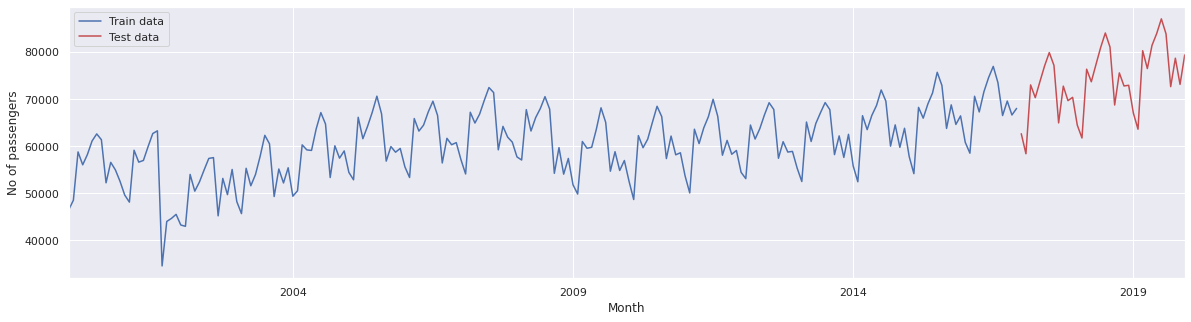

In [22]:
sns.set()
fig,ax=plt.subplots(figsize=(20,5))
train_data.plot(kind="line",ax=ax,color="b")
test_data.plot(kind="line",ax=ax,color="r")
plt.xlabel("Month")
plt.ylabel("No of passengers")
plt.legend(["Train data","Test data"])
plt.show()

# ARMA Model (p,q)
#### Steps for ARMA
1. Augmented Dickey-Fuller unit root test for stationary
2. If not stationary convert into stationary
3. Find p,q
- p: AR order(pacf)
- q: MA order(acf)
4. Train ARMA model
5. Convert the stationary data to non stationary data

### Step 1: **Augmented Dickey-Fuller**

#### Hupothesis Testing
- Significance level = 5%
  - p-value = 0.025
- Ho: Data is non-stationary (p-value > 0.025) : Bulk region
- Ha: Data is stationary (p-value < 0.025) : Critical region

In [23]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(train_data) # Second term gives the p_value

(-0.9529124941948434,
 0.7700488660390645,
 13,
 190,
 {'1%': -3.4652439354133255,
  '10%': -2.574944653739612,
  '5%': -2.8768752281673717},
 3449.617955746232)

- As p-value=0.770048, So data is non-stationary with 5% significance.
- So we need to convert data into stationary.

### Step 2: **Converting non-stationary data to stationary**


In [28]:
stationary_train_data=train_data.diff() # Differencing technique
stationary_train_data.dropna(inplace=True) # Dropping null values

In [31]:
train_data.head()

,passengers
month,
2000-01-01,46492
2000-02-01,48526
2000-03-01,58764
2000-04-01,56033
2000-05-01,58201


In [30]:
stationary_train_data.head()

,passengers
month,
2000-02-01,2034.0
2000-03-01,10238.0
2000-04-01,-2731.0
2000-05-01,2168.0
2000-06-01,2872.0


In [32]:
#### Visualization of converted stationary data

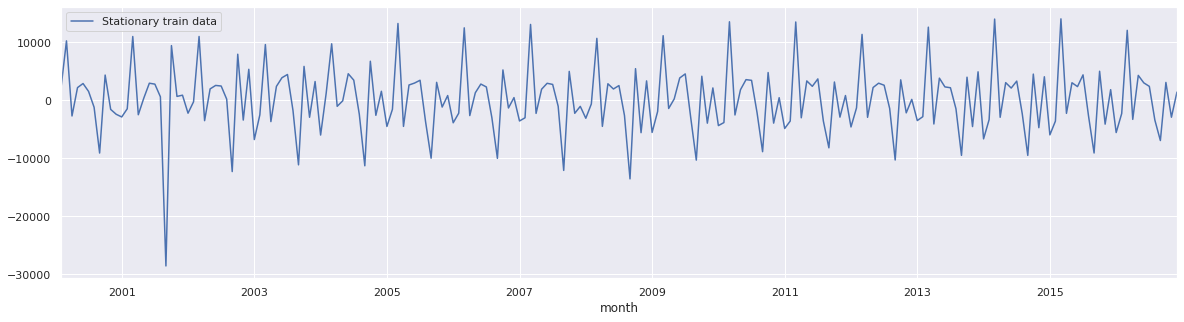

In [35]:
fig,ax=plt.subplots(figsize=(20,5))
stationary_train_data.plot(kind="line",ax=ax)
plt.legend(["Stationary train data"])
plt.show()

In [36]:
#### Testing for stationary of converted train data

In [37]:
adfuller(stationary_train_data)

(-3.770003898122402,
 0.0032295638943137133,
 12,
 190,
 {'1%': -3.4652439354133255,
  '10%': -2.574944653739612,
  '5%': -2.8768752281673717},
 3430.804868488187)

#### - Here p=0.0032 < 0.025 => We are rejecting null hypothesis and accepting alternative hypothesis
 - So data is stationary 

### Step 3: **Find p & q**
- p: AR order (pacf)
- q: MA order (acf)

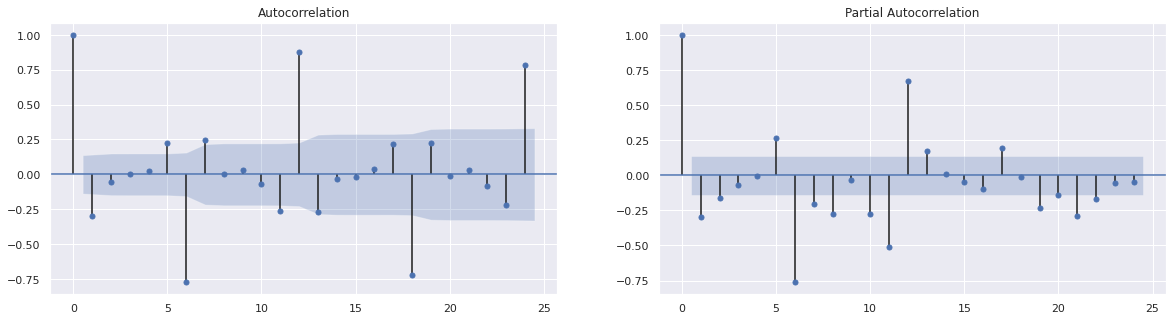

In [40]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
fig=plot_acf(stationary_train_data,ax=ax[0])
fig=plot_pacf(stationary_train_data,ax=ax[1])

- p=6
- q=6

### Step 3: **Train ARMA model**

In [41]:
p,q=(6,6)
model_arma=ARMA(stationary_train_data,order=(p,q)).fit()

Evaluation of ARMA model

In [42]:
model_arma.aic # Error (Smaller the value, better will be the model)

3782.022314233962

In [43]:
#### Evaluating MSE
from sklearn.metrics import mean_squared_error
fitted_values=model_arma.fittedvalues
mse=mean_squared_error(stationary_train_data,fitted_values)
print("MSE is:",mse)

MSE is: 8059227.968474685


Visualization

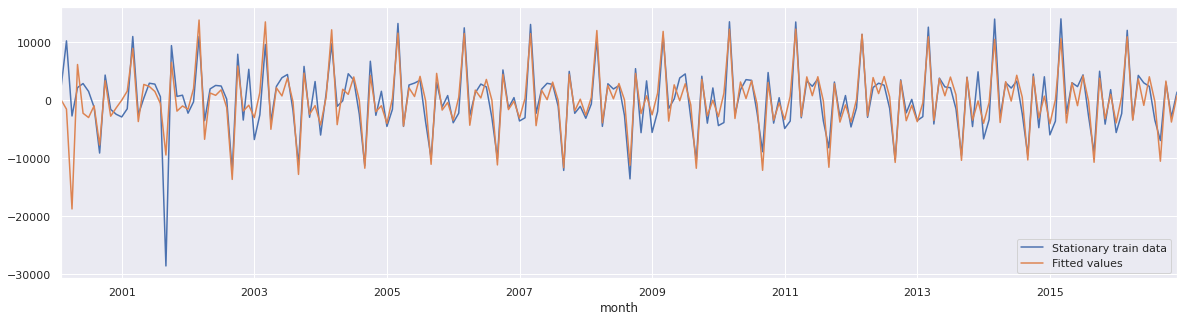

In [45]:
fig,ax=plt.subplots(figsize=(20,5))
stationary_train_data.plot(kind="line",ax=ax)
fitted_values.plot(kind="line",ax=ax)
plt.legend(["Stationary train data","Fitted values"])
plt.show()

Prediction Values

In [56]:
train_data.iloc[-1] # Last value of training dataset is initial value

passengers    67983
Name: 2016-12-01 00:00:00, dtype: int64

In [57]:
start_date=datetime.strptime("2017-01-01","%Y-%m-%d")
end_date=datetime.strptime("2019-12-01","%Y-%m-%d")
prediction_values=model_arma.predict(start=start_date,end=end_date) # Here these prediction values are stationary in nature



# Converting the stationary predicted values into non stationary predicted values
initial_value=67983 # Last value of training dataset is initial value
#Reverse of diff is cumulative 
forcasted_values=initial_value + prediction_values.cumsum()
forcasted_values

2017-01-01    64473.005384
2017-02-01    64593.435452
2017-03-01    74843.507560
2017-04-01    71619.889959
2017-05-01    75453.022685
2017-06-01    74691.077231
2017-07-01    78424.390048
2017-08-01    78555.815510
2017-09-01    68658.699414
2017-10-01    72121.538670
2017-11-01    68504.873129
2017-12-01    69610.609319
2018-01-01    66076.652288
2018-02-01    66118.713542
2018-03-01    76087.347561
2018-04-01    72809.847143
2018-05-01    76634.349227
2018-06-01    75610.391397
2018-07-01    79367.991461
2018-08-01    79572.827785
2018-09-01    69953.917341
2018-10-01    73467.241683
2018-11-01    69856.347546
2018-12-01    71218.683969
2019-01-01    67660.115726
2019-02-01    67633.618281
2019-03-01    77327.195872
2019-04-01    74002.509722
2019-05-01    77823.951828
2019-06-01    76548.701501
2019-07-01    80331.235653
2019-08-01    80599.882467
2019-09-01    71252.959912
2019-10-01    74810.265540
2019-11-01    71199.863320
2019-12-01    72808.286290
Freq: MS, dtype: float64

Visualization

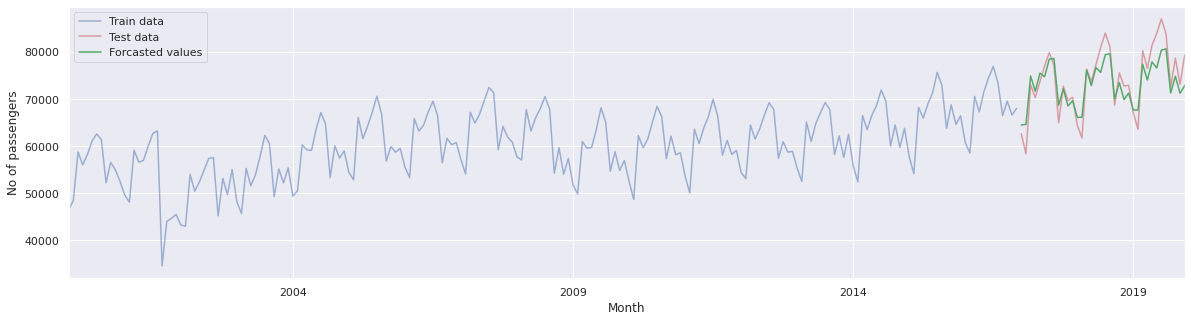

In [60]:
fig,ax=plt.subplots(figsize=(20,5))
train_data.plot(kind="line",ax=ax,color="b",alpha=0.5)
test_data.plot(kind="line",ax=ax,color="r",alpha=0.5)

forcasted_values.plot(kind="line",ax=ax,color="g")
plt.xlabel("Month")
plt.ylabel("No of passengers")
plt.legend(["Train data","Test data","Forcasted values"])
plt.show()

# ARIMA Model
 - Here we have already concerted our data to stationary. So d=0
 - Therefore, (p,d,q)=(6,0,6)

In [61]:
model_arima=ARIMA(stationary_train_data,order=(6,0,6)).fit()

Predicted values

In [62]:
start_date=datetime.strptime("2017-01-01","%Y-%m-%d")
end_date=datetime.strptime("2019-12-01","%Y-%m-%d")
prediction_values_arima=model_arima.predict(start=start_date,end=end_date) # Here these prediction values are stationary in nature



# Converting the stationary predicted values into non stationary predicted values
initial_value=67983 # Last value of training dataset is initial value
#Reverse of diff is cumulative 
forcasted_values_arima=initial_value + prediction_values.cumsum()
forcasted_values_arima

2017-01-01    64473.005384
2017-02-01    64593.435452
2017-03-01    74843.507560
2017-04-01    71619.889959
2017-05-01    75453.022685
2017-06-01    74691.077231
2017-07-01    78424.390048
2017-08-01    78555.815510
2017-09-01    68658.699414
2017-10-01    72121.538670
2017-11-01    68504.873129
2017-12-01    69610.609319
2018-01-01    66076.652288
2018-02-01    66118.713542
2018-03-01    76087.347561
2018-04-01    72809.847143
2018-05-01    76634.349227
2018-06-01    75610.391397
2018-07-01    79367.991461
2018-08-01    79572.827785
2018-09-01    69953.917341
2018-10-01    73467.241683
2018-11-01    69856.347546
2018-12-01    71218.683969
2019-01-01    67660.115726
2019-02-01    67633.618281
2019-03-01    77327.195872
2019-04-01    74002.509722
2019-05-01    77823.951828
2019-06-01    76548.701501
2019-07-01    80331.235653
2019-08-01    80599.882467
2019-09-01    71252.959912
2019-10-01    74810.265540
2019-11-01    71199.863320
2019-12-01    72808.286290
Freq: MS, dtype: float64

Confidence Interval

In [64]:
for_value=model_arima.forecast(steps=36) # Steps=len(forcasted_values_arima)
for_value

(array([-3509.99461558,   120.43006735, 10250.07210779, -3223.6176003 ,
         3833.13272554,  -761.94545401,  3733.31281687,   131.42546267,
        -9897.11609618,  3462.83925612, -3616.6655414 ,  1105.73618979,
        -3533.9570306 ,    42.06125377,  9968.63401881, -3277.50041805,
         3824.50208407, -1023.95782955,  3757.60006366,   204.83632429,
        -9618.91044369,  3513.32434148, -3610.89413721,  1362.33642346,
        -3558.56824346,   -26.49744426,  9693.57759025, -3324.68614974,
         3821.44210589, -1275.25032641,  3782.53415154,   268.64681419,
        -9346.92255547,  3557.30562856, -3610.40221973,  1608.42296929]),
 array([2349.85834409, 2372.96457311, 2375.68001783, 2385.98934452,
        2387.05650691, 2405.36763641, 2413.75338097, 2435.51564857,
        2437.94836182, 2447.71678126, 2448.53322206, 2465.64179469,
        2473.59461103, 2494.13575605, 2496.31695237, 2505.6013998 ,
        2506.21203882, 2522.23683122, 2529.79276603, 2549.21757087,
        25

In [68]:
confidence_interval=for_value[-1]
confidence_interval

array([[ -8115.63233876,   1095.6431076 ],
       [ -4530.49503254,   4771.35516725],
       [  5593.82483404,  14906.31938154],
       [ -7900.07078306,   1452.83558246],
       [  -845.41205707,   8511.67750815],
       [ -5476.37939096,   3952.48848293],
       [  -997.5568774 ,   8464.18251114],
       [ -4642.09749231,   4904.94841764],
       [-14675.40708152,  -5118.82511085],
       [ -1334.5974795 ,   8260.27599174],
       [ -8415.70247158,   1182.37138878],
       [ -3726.83292658,   5938.30530615],
       [ -8382.11338057,   1314.19931937],
       [ -4846.35500065,   4930.47750819],
       [  5075.94269817,  14861.32533945],
       [ -8188.38892127,   1633.38808517],
       [ -1087.58324965,   8736.58741778],
       [ -5967.45117923,   3919.53552012],
       [ -1200.70264611,   8715.90277343],
       [ -4791.53830337,   5201.21095194],
       [-14619.11981662,  -4618.70107077],
       [ -1504.22887328,   8530.87755623],
       [ -8629.31638311,   1407.52810869],
       [ -3

In [69]:
upper_limit_confidence_interval=forcasted_values_arima+confidence_interval[:,1]
lower_limit_confidence_interval=forcasted_values_arima-confidence_interval[:,0]

Visualization of ARIMA model

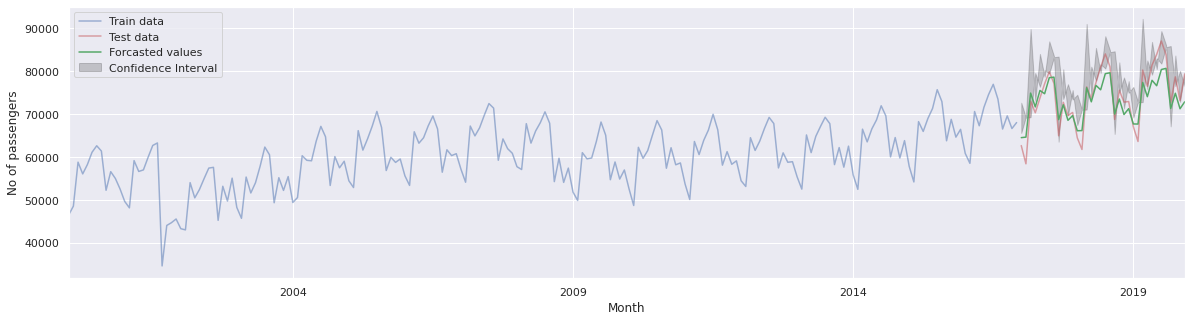

In [72]:
fig,ax=plt.subplots(figsize=(20,5))
train_data.plot(kind="line",ax=ax,color="b",alpha=0.5)
test_data.plot(kind="line",ax=ax,color="r",alpha=0.5)

forcasted_values_arima.plot(kind="line",ax=ax,color="g")
plt.fill_between(test_data.index,lower_limit_confidence_interval,upper_limit_confidence_interval,color="k",alpha=0.2)

plt.xlabel("Month")
plt.ylabel("No of passengers")
plt.legend(["Train data","Test data","Forcasted values","Confidence Interval"])
plt.show()